In [1]:
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
import librosa as rosa
import numpy as np

In [2]:
df = pd.read_csv('ESC-50/meta/esc50.csv')

In [3]:
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


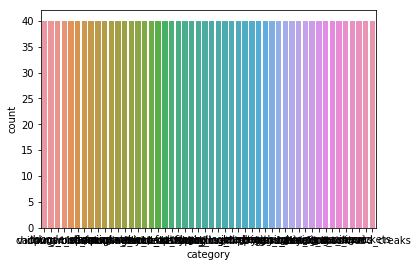

In [4]:
sns.countplot(df['category'])

## Preprocessing
Just MFCC were sufficient in previous work.
13 coefficients together with first and second derivatives and remove first energy component.
Should yield vector of 38 features per time frame.

In [5]:
y, sr = rosa.load(rosa.util.example_audio_file(), offset=30, duration=5)

In [6]:
mfccs = rosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

In [7]:
mfcc_delta = rosa.feature.delta(mfccs)

/home/rocket/miniconda3/envs/gmm-test/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [8]:
mfcc_delta_2 = rosa.feature.delta(mfccs, order=2)

In [9]:
mfcc_data = np.vstack((mfccs[1:],mfcc_delta,mfcc_delta_2))

In [10]:
mfcc_data.shape

(38, 216)

In [11]:
def preprocess(path):
    y, sr = rosa.load(path)
    mfccs = rosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    delta = rosa.feature.delta(mfccs)
    delta_2 = rosa.feature.delta(mfccs, order=2)
    return np.vstack((mfccs[1:], delta, delta_2))

In [12]:
def preprocess_df(data, audio_dir):
    processed_data = []
    for file in data['filename']:
        full_path = audio_dir + file
        processed_data.append(preprocess(full_path))
    return processed_data        

In [13]:
def preprocess_fold(fld, data, audio_dir):
    f_df = data[data['fold'] == fld]
    return preprocess_df(f_df, audio_dir)

In [14]:
audio_dir = 'ESC-50/audio/'
p1_data = preprocess_fold(1, df, audio_dir)

In [15]:
p1_data

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[-22.34895597, -16.32526362, -12.56049392, ...,   5.84484192,
          15.74733151,  21.29470348],
        [-52.70884129, -47.03553919, -50.99887933, ..., -63.30762578,
         -52.14666023, -37.3147517 ],
        [  3.6648228 ,  -0.52184903,  -4.61299789, ...,  12.02618917,
          25.77531525,  27.87798359],
        ...,
        [ -0.55413403,  -0.55413403,  -0.55413403, ...,   0.96516783,
           0.96516783,   0.96516783],
        [ -0.41136898,  -0.41136898,  -0.41136898, ...,   0.16336255,
           0.16336255,   0.16336255],
        [  0.45133027,   0.45133027,   0.45133027, ...,   1.10968141,
           1.10968141,   1.10968141]]),
 array([[133.13734077, 131.22171022, 109.40508895, ...,  63.29534297,
          58.43179

## Background GMM

In [10]:
g = GaussianMixture(n_components=1)

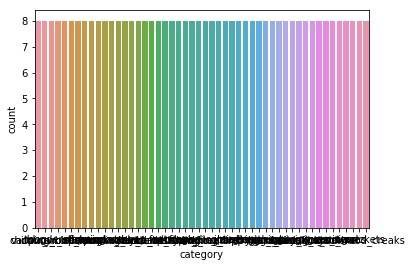

In [12]:
sns.countplot(train_fold.category)